In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 159M/163M [00:01<00:00, 174MB/s]
100% 163M/163M [00:01<00:00, 146MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


# Importing Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3141.jpg', 'with_mask_3577.jpg', 'with_mask_2780.jpg', 'with_mask_2556.jpg', 'with_mask_2218.jpg']
['with_mask_1770.jpg', 'with_mask_3217.jpg', 'with_mask_2343.jpg', 'with_mask_3406.jpg', 'with_mask_1635.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_9.jpg', 'without_mask_3369.jpg', 'without_mask_1559.jpg', 'without_mask_564.jpg', 'without_mask_570.jpg']
['without_mask_1833.jpg', 'without_mask_2471.jpg', 'without_mask_3254.jpg', 'without_mask_1264.jpg', 'without_mask_1483.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828




Creating Labels for the two class of Images


with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]




# Displaying the Images

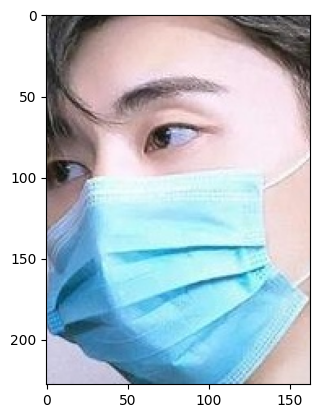

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

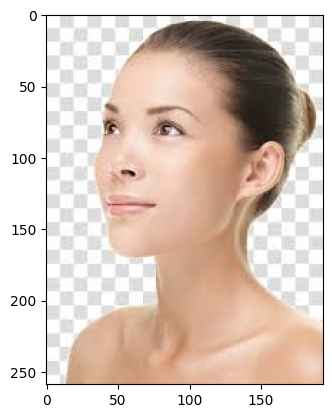

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()


# Image Processing

    Resize the Images
    Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[123, 153, 207],
        [119, 149, 203],
        [120, 150, 204],
        ...,
        [255, 254, 253],
        [253, 255, 253],
        [255, 255, 255]],

       [[122, 152, 206],
        [119, 149, 203],
        [120, 150, 204],
        ...,
        [255, 255, 254],
        [255, 255, 253],
        [255, 255, 255]],

       [[121, 151, 205],
        [120, 150, 204],
        [120, 150, 204],
        ...,
        [250, 253, 253],
        [253, 255, 253],
        [255, 255, 255]]], dtype=uint8)
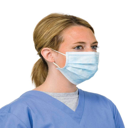

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


# Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[ 48,  48,  58],
        [ 49,  49,  59],
        [ 49,  49,  59],
        ...,
        [ 90,  92, 104],
        [ 92,  94, 106],
        [103, 105, 117]],

       [[ 48,  48,  58],
        [ 49,  49,  59],
        [ 50,  50,  60],
        ...,
        [ 90,  93, 102],
        [ 93,  97, 105],
        [101, 104, 113]],

       [[ 47,  50,  59],
        [ 47,  50,  59],
        [ 49,  50,  60],
        ...,
        [ 89,  93,  98],
        [ 93,  99, 105],
        [ 98, 104, 109]],

       ...,

       [[ 33,  36,  45],
        [ 33,  36,  45],
        [ 33,  36,  45],
        ...,
        [ 92, 101, 131],
        [ 82,  90, 119],
        [ 72,  79, 106]],

       [[ 34,  37,  46],
        [ 34,  37,  46],
        [ 33,  36,  45],
        ...,
        [ 80,  89, 120],
        [ 72,  80, 109],
        [ 60,  67,  92]],

       [[ 33,  36,  45],
        [ 33,  36,  45],
        [ 33,  36,  45],
        ...,
        [ 74,  83, 112],
        [ 55,  65,  91],
        [ 47,  55,  78]]], dtype=uint8)
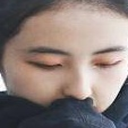

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.18823529, 0.18823529, 0.22745098],
        [0.19215686, 0.19215686, 0.23137255],
        [0.19215686, 0.19215686, 0.23137255],
        ...,
        [0.35294118, 0.36078431, 0.40784314],
        [0.36078431, 0.36862745, 0.41568627],
        [0.40392157, 0.41176471, 0.45882353]],

       [[0.18823529, 0.18823529, 0.22745098],
        [0.19215686, 0.19215686, 0.23137255],
        [0.19607843, 0.19607843, 0.23529412],
        ...,
        [0.35294118, 0.36470588, 0.4       ],
        [0.36470588, 0.38039216, 0.41176471],
        [0.39607843, 0.40784314, 0.44313725]],

       [[0.18431373, 0.19607843, 0.23137255],
        [0.18431373, 0.19607843, 0.23137255],
        [0.19215686, 0.19607843, 0.23529412],
        ...,
        [0.34901961, 0.36470588, 0.38431373],
        [0.36470588, 0.38823529, 0.41176471],
        [0.38431373, 0.40784314, 0.42745098]],

       ...,

       [[0.12941176, 0.14117647, 0.17647059],
        [0.12941176, 0.14117647, 0.17647059],
        [0.12941176, 0

# Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 162s 927ms/step - loss: 0.4474 - acc: 0.7966 - val_loss: 0.2848 - val_acc: 0.8959
Epoch 2/5
170/170 [==============================] - 138s 814ms/step - loss: 0.2648 - acc: 0.8998 - val_loss: 0.2260 - val_acc: 0.9074
Epoch 3/5
170/170 [==============================] - 133s 783ms/step - loss: 0.2188 - acc: 0.9136 - val_loss: 0.2592 - val_acc: 0.9058
Epoch 4/5
170/170 [==============================] - 136s 802ms/step - loss: 0.1679 - acc: 0.9288 - val_loss: 0.2389 - val_acc: 0.9157
Epoch 5/5
170/170 [==============================] - 136s 803ms/step - loss: 0.1575 - acc: 0.9356 - val_loss: 0.2066 - val_acc: 0.9322


# Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 9s 184ms/step - loss: 0.2321 - acc: 0.9166
Test Accuracy = 0.9166114926338196


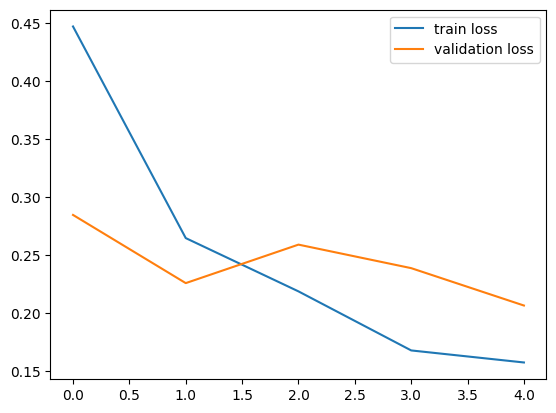

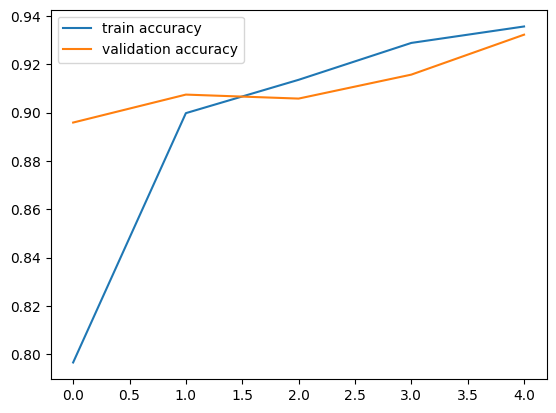

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# Predictive System

Path of the image to be predicted: /content/mask2.jpg


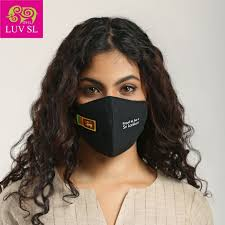

1/1 [==============================] - 0s 32ms/step
[[0.1790013 0.9385939]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')